In [32]:
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as gr
import time

# **Common methods and derivations from Integration rules**

Consider the initial value problem (IVP) for the ordinary differential equation (ODE):
$$
\begin{align*}
y'(t) &= f(t,y(t)), \hspace{5mm} t_0 \leq t \leq T \\
y(t_0) &= y_0
\end{align*}
$$

Integrating both sides for $t \in [t_i, t_{i+1}] \subseteq [t_0,T]$, we obtain,
$$ y(t_{i+1})-y(t_i) = \int\limits_{t_i}^{t_{i+1}} f(s, y(s))ds $$

Using left endpoint rule for approximating the integral (using the notation $y(t_i)=y_i$), we obtain,
$$ y_{i+1}-y_i \approx (t_{i+1}-t_i)f(t_i,y_i) $$

# **Forward Euler (using left endpoint)**
From the above equation we can define the process of Forward Euler iteration as,
$$ y_{i+1} = y_i + \Delta t f(t_i,y_i), $$
where we obtain the $y$-value at $t_{i+1}$ using the $y$-value for the previous iteration, i.e., at the point $t_i$.

### **Exercise**
Consider the initial value problem (IVP)
$$y' = - \sin(x) \;\;\;\; y(0) = 3$$
Use Forward Euler method with step size $h = \frac{\pi}{5}$ to approximate,
$y(\frac{\pi}{5}), y(\frac{2\pi}{5}).$

* Use Python to implement the forward Euler method
* Show numerically that error for FE is $O(\Delta t)$

In [33]:
# Forward Euler itreative method
def forwardEuler(f,t,y0):
    n=len(t)
    y=np.zeros(n)
    y[0]=y0
    for i in range(n-1):
        y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])
    return y

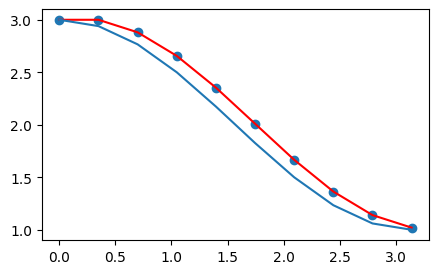

In [34]:
def func(t,y):
    return -np.sin(t)
t=np.linspace(0,np.pi,10)
y0=3
y=forwardEuler(func,t,y0)
plt.figure(figsize=(5,3))
plt.plot(t,y,'r')
plt.scatter(t,y)

y=np.cos(t)+2
plt.plot(t,y)

plt.show()

### **Exercise**
Consider the initial value problem (IVP)
$$y' = y \;\;\;\; y(0) = 1$$
Use Forward Euler method with step size $h = 0.2$ to approximate,
$y(0.2), y(0.4).$

# **Backward Euler (using right endpoint)**
For each sub-interval, instead of left endpoint, if we approximate using right endpoint rule, we obtain,
$$ y_{i+1} = y_i + \Delta t f(t_{i+1},y_{i+1}), $$
The difference with Forward Euler method is that, in order to obtain $y_{i+1}$ we have to solve the equation,
$$ y_{i+1} - y_i - \Delta t f(t_{i+1},y_{i+1}) =0. $$

### **Exercise**
Consider the initial value problem (IVP)
$$y' = y \;\;\;\; y(0) = 1$$
Use Backward Euler method with step size $h = 0.2$ to approximate,
$y(0.2), y(0.4).$

### **Exercise**
Consider the initial value problem (IVP)
$$y' = - \sin(x) \;\;\;\; y(0) = 3$$
Use Backward Euler method with step size $h = \frac{\pi}{5}$ to approximate,
$y(\frac{\pi}{5}), y(\frac{2\pi}{5}).$


In [35]:
def backwardEuler(func,t,y0):
    n=len(t)
    y=np.zeros(n)
    y[0]=y0
    for i in range(n-1):
        f = lambda x : x - y[i] - (t[i+1]-t[i])*func(t[i+1],x)
        # Find a root of the function f using the Newton-Raphson
        # using initial guess y[i]
        y[i+1] = scipy.optimize.newton(f,y[i])
    return y

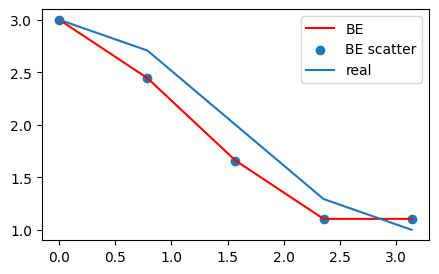

In [36]:
def func(t,y):
    return -np.sin(t)
t=np.linspace(0,np.pi,5)
y0=3
y=backwardEuler(func,t,y0)
plt.figure(figsize=(5,3))
plt.plot(t,y,'r')
plt.scatter(t,y)

y=np.cos(t)+2
plt.plot(t,y)

plt.legend(['BE','BE scatter','real'])
plt.show()

# **Crank-Nicolson (using midpoint rule)**
$$y_{i+1} = y_i + \Delta t f\left(\frac{t_{i+1}+t_i}{2},y\left(\frac{t_{i+1}+t_i}{2}\right)\right).$$
Note that,
$$y\left(\frac{t_{i+1}+t_i}{2}\right) = y\left( t_i+ \frac{\Delta t}{2} \right) \approx y_i + \frac{\Delta t}{2}\left(\frac{y_{i+1}-y_i}{\Delta t}\right)= \frac{y_{i+1}+y_i}{2}.$$
Hence,
$$y_{i+1} = y_i + \Delta t f\left(\frac{t_{i+1}+t_i}{2},\frac{y_{i+1}+y_i}{2}\right).$$

### **Exercise**
For the IVP
$$y' = t+y, \;\;\; y(0)=1$$
Use Crank-Nicolson method with step size $h = 0.2$ to approximate,
$y(0.2), y(0.4).$

### **Error of CN is $O(\Delta t^2)$**

In [37]:
# Crank Nicolson
def crankNicolson(func,t,y0):
  n=len(t)
  y=np.zeros(n)
  y[0]=y0
  for i in range(n-1):
    f = lambda x : x - y[i] - (t[i+1]-t[i])*(func((t[i+1]+t[i])/2,(y[i]+x)/2))
    y[i+1]=scipy.optimize.newton(f,y[i])
  return y

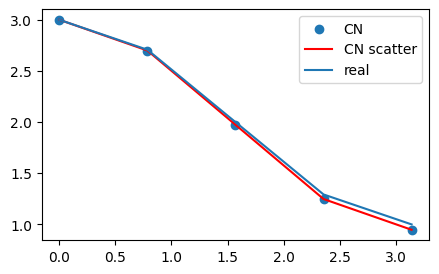

In [38]:
def func(time,y):
  return -np.sin(time)
t=np.linspace(0,np.pi,5)
y0=3
y=crankNicolson(func,t,y0)
plt.figure(figsize=(5,3))
plt.scatter(t,y)
plt.plot(t,y,'r')

y=np.cos(t)+2
plt.plot(t,y)

plt.legend(['CN','CN scatter','real'])
plt.show()

# **Runge-Kutta 4**
The last method is the fourth order Runge Kutta method, often called RK4. It is explicit and hence very fast, but it is significantly more accurate than the other methods above. It can have stability issues, however, it is very efficient when it works. It is the most commonly used ODE solver for IVPs. Its error is in the $O(\Delta t ^4)$.<br>
Using Simpson Quadrature rule we obtain:
$$
\begin{align*}
y_{i+1} &\approx y_i + (t_{i+1} - t_i)\Bigg(\frac{1}{6}f\big(t_i,y_i\big) + \frac{2}{3} f\bigg(\frac{t_{i+1}+t_i}{2}, y\Big(\frac{t_{i+1}+t_i}{2}\Big)\bigg) + \frac{1}{6}f\big(t_{i+1},y_{i+1}\big) \Bigg) \\
& \approx y_i+ \Delta t \bigg(\frac{K_1}{6} + \frac{K_2}{3} + \frac{K_3}{3} + \frac{K_4}{6}\bigg).
\end{align*}
$$
Where,
$$
\begin{align*}
&K_1 = f(t_i,y_i).\\
& \\
&K_2 = f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} K_1\bigg)
\text{, which is obtained by approximating by left endpoint rule } \\ &\text{on the interval } \left[ t_i, t_i + \frac{\Delta t_i}{2} \right] \text{ so that ,}\\ & f\bigg(t_i + \frac{\Delta t_i}{2} , y\big(t_i+\frac{\Delta t_i}{2}\big) \bigg)\approx f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} f(t_i,y_i)\bigg) = f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} K_1\bigg).\\
& \\
\end{align*}
$$

$$
\begin{align*}
&K_3 = f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} K_2\bigg)
\text{, which is obtained by approximating by right endpoint } \\ &\text{on the interval } \left[t_i, t_i + \frac{\Delta t_i}{2} \right] \text{ so that ,}
\end{align*}
$$
$$
\begin{align*}
f\bigg(t_i + \frac{\Delta t_i}{2} , y\big(t_i+\frac{\Delta t}{2}\big) \bigg)&\approx f\Bigg(t_i + \frac{\Delta t_i}{2} , y_i + \frac{\Delta t_i}{2}f\Big(t_i+\frac{\Delta t}{2}, y\big(t_i + \frac{\Delta t_i}{2}\big)\Big)\Bigg)\\
&\approx f\Bigg(t_i + \frac{\Delta t_i}{2} , y_i + \frac{\Delta t_i}{2}f\Big(t_i+\frac{\Delta t}{2}, y_i + \frac{\Delta t_i}{2} K_1 \Big)\Bigg)\\
&\approx f\Bigg(t_i + \frac{\Delta t_i}{2} , y_i + \frac{\Delta t_i}{2}K_2\Bigg).
\end{align*}
$$

$$
\begin{align*}
&K_4 = f\big(t_i+\Delta t_i, y_i+\Delta t_i K_3\big)
\text{ which is obtained by the approximating by midpoint }\\ &\text{on the interval } \left[t_i, t_{i+1} \right] \text{ so that ,}
\end{align*}
$$
$$
\begin{align*}
f\big(t_{i+1}, y_{i+1}\big) &\approx f\Bigg(t_i + \Delta t_i , y_i + \Delta t_i f\Big(t_i+\frac{\Delta t}{2}, y\big(t_i + \frac{\Delta t_i}{2}\big)\Big)\Bigg)\\
& \approx f\big( t_i + \Delta t_i, y_i + \Delta t_i K_3)\big).\\
\end{align*}
$$

Hence,
$$
\begin{align*}
&K_1 = f(t_i,y_i)\\
&K_2 = f\bigg(t_i+\frac{\Delta t_i}{2}, y_i+\frac{\Delta t_i}{2} K_1\bigg)\\
&K_3 = f\Bigg(t_i + \frac{\Delta t_i}{2} , y_i + \frac{\Delta t_i}{2}K_2\Bigg) \\
&K_4 = f\big( t_i + \Delta t_i, y_i + \Delta t_i K_3)\big).
\end{align*}
$$

$$y_{i+1}=y_i+ \Delta t \bigg(\frac{K_1}{6} + \frac{K_2}{3} + \frac{K_3}{3} + \frac{K_4}{6}\bigg).$$

### **Exercise**
For the IVP
$$y' = t+y, \;\;\; y(0)=1$$
* The real solution to the above IVP is
$$y(t) = -(t+1)+2e^t$$
* Use Forward Euler, Backward Euler, Crank-Nicolson and RK-4 methods with step size $h = 0.2$ to approximate,
$y(0.2).$
* Compute the approximation error in each case.

### **Accuracy of RK4 is $O(\Delta t ^4)$**

In [39]:
# RK4 (Runge Kutta)
def rk4(func,t,y0):
  n=len(t)
  y=np.zeros(n)
  y[0]=y0
  for i in range(n-1):
    dt = t[i+1]-t[i]
    k1 = func(t[i],y[i])
    k2 = func(t[i]+dt/2, y[i]+(dt/2)*k1)
    k3 = func(t[i]+dt/2, y[i]+(dt/2)*k2)
    k4 = func(t[i]+dt, y[i]+dt*k3)
    y[i+1] = y[i] + dt*(k1/6 + k2/3 + k3/3 + k4/6)
  return y

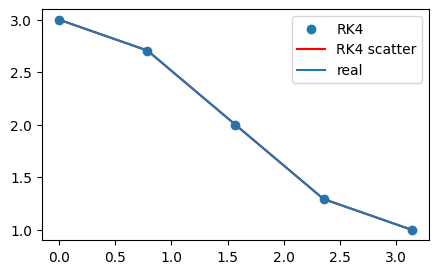

In [40]:
def func(time,y):
  return -np.sin(time)
t=np.linspace(0,np.pi,5)
y0=3
y=rk4(func,t,y0)
plt.figure(figsize=(5,3))
plt.scatter(t,y)
plt.plot(t,y,'r')

y=np.cos(t)+2
plt.plot(t,y)

plt.legend(['RK4','RK4 scatter','real'])
plt.show()

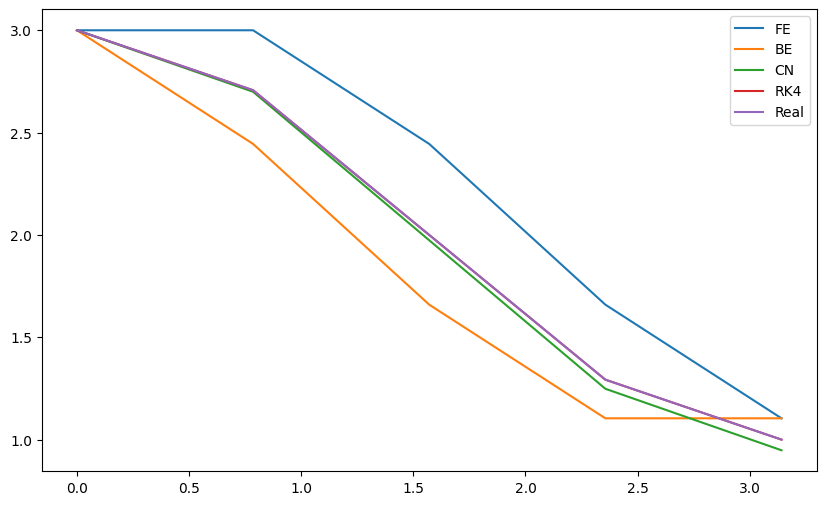

In [41]:
# Compare the ODS solvers
def func(time,y):
  return -np.sin(time)
t=np.linspace(0,np.pi,5)
y0=3

plt.figure(figsize=(10,6))

y=forwardEuler(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

y=backwardEuler(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

y=crankNicolson(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

y=rk4(func,t,y0)
#plt.scatter(t,y)
plt.plot(t,y)

yReal = np.cos(t)+2
#plt.scatter(t,y)
plt.plot(t,y)

plt.legend(['FE','BE','CN','RK4','Real'])

plt.show()

# **Comparison of speed between solvers**

$$y'(t)=-1.2 y + 7 e^{-0.3 t}, \;\; y(0)=3, \;\; 0 \leq t \leq 2.5=T$$

The true solution is given by
$$y(t) = \frac{70}{9} e^{-0.3 t} - \frac{43}{9} e^{-1.2 t}$$

Time elapsed for FE : 0.004396915435791016
Time elapsed for BE : 0.0502467155456543
Time elapsed for CN : 0.05234098434448242
Time elapsed for RK4 : 0.009211540222167969


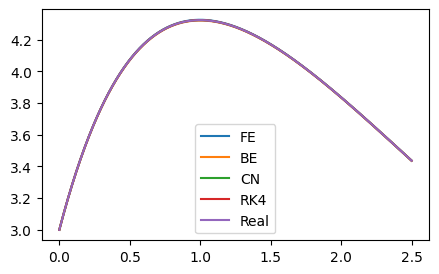

In [42]:
def func(t,y):
  return -1.2*y+7*np.exp(-0.3*t)
t=np.linspace(0,2.5,1001)
y0=3

plt.figure(figsize=(5,3))

tim=time.time()
y=forwardEuler(func,t,y0)
print("Time elapsed for FE :",time.time()-tim)
plt.plot(t,y)

tim=time.time()
y=backwardEuler(func,t,y0)
print("Time elapsed for BE :",time.time()-tim)
plt.plot(t,y)

tim=time.time()
y=crankNicolson(func,t,y0)
print("Time elapsed for CN :",time.time()-tim)
plt.plot(t,y)

tim=time.time()
y=rk4(func,t,y0)
print("Time elapsed for RK4 :",time.time()-tim)
plt.plot(t,y)

yReal = (70/9)*np.exp(-0.3*t)-(43/9)*np.exp(-1.2*t)
plt.plot(t,y)

plt.legend(['FE','BE','CN','RK4','Real'])
plt.show()

The implicit methods are significantly slower.

# **Accuracy**

We compute the errors for each method with
$$ \Delta t = T/10,T/20,T/40,T/80.$$
The error is defined as
$$ err = \max\limits_{i=1,2,\cdots, n} \left| y_{true}(t_i) - y_i \right|$$

In [43]:
def func(t,y):
  return -1.2*y+7*np.exp(-0.3*t)
y0=3

def trueSolution(t):
  return (70/9)*np.exp(-0.3*t)-(43/9)*np.exp(-1.2*t)

nPoints = [11,21,41,81]

print('Forward Euler')
errFE=[]
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=forwardEuler(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errFE.append(err)
  print('dt = T /',i-1, '    error = ',err)

print('\nBackward Euler')
errBE = []
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=backwardEuler(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errBE.append(err)
  print('dt = T /',i-1, '    error = ',err)

print('\nCrank-Nicolson')
errCN = []
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=crankNicolson(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errCN.append(err)
  print('dt = T /',(i-1), '    error = ',err)

print('\nRunge Kutta')
errRK4=[]
for i in nPoints:
  t=np.linspace(0,2.5,i)
  y=rk4(func,t,y0)
  yTrue = trueSolution(t)
  err = np.linalg.norm(y-yTrue, np.inf)
  errRK4.append(err)
  print('dt = T /',i-1, '    error = ',err)

Forward Euler
dt = T / 10     error =  0.2610425134618142
dt = T / 20     error =  0.12045756576442734
dt = T / 40     error =  0.05804152341495605
dt = T / 80     error =  0.028515985333185334

Backward Euler
dt = T / 10     error =  0.197506993265816
dt = T / 20     error =  0.10492543978986024
dt = T / 40     error =  0.054231739449569716
dt = T / 80     error =  0.02757106083006633

Crank-Nicolson
dt = T / 10     error =  0.01061003789301651
dt = T / 20     error =  0.002630318905069373
dt = T / 40     error =  0.0006562104829574977
dt = T / 80     error =  0.0001639673149265164

Runge Kutta
dt = T / 10     error =  0.0001280415537845414
dt = T / 20     error =  7.004976423807818e-06
dt = T / 40     error =  4.096745387371925e-07
dt = T / 80     error =  2.4773068929562214e-08


Recall:
$$ err = O(\Delta t ^k)$$
means
$$ k \approx \frac{\log{\frac{e_1}{e_2}}}{\log{\frac{\Delta t_1}{\Delta t_2}}}$$

### **Exercise**
Numerically verify the order of accuracy for each ODE Solver.

In [44]:
print('k for FE: ', np.log(errFE[-1]/errFE[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))
print('k for BE: ', np.log(errBE[-1]/errBE[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))
print('k for CN: ', np.log(errCN[-1]/errCN[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))
print('k for RK4: ', np.log(errRK4[-1]/errRK4[-2])/(np.log((1/nPoints[-1])/(1/nPoints[-2]))))

k for FE:  1.043791704824005
k for BE:  0.9935708598712533
k for CN:  2.036805924917588
k for RK4:  4.120576170390032


# **Stability of ODE solvers**

Consider the IVP
$$y' = \lambda y, \;\;\; y(0)=1$$
with the exact solution
$$y(t) = e^{\lambda t}$$
Let $\lambda = a + ib \in \mathbb{C}.$ The solution can be written using De'Moivre's Th. as
$$y(t) = e^{at}\left(\cos(bt) + i \sin(bt)\right)$$
The solution is unstable when $a = Re(\lambda)>0$ and stable when $a = Re(\lambda) \leq 0.$
To check the stability of a numerical solver, the numerical solution should be stable for an IVP with stable solution.

### **Stability of Forward Euler**
For $\Delta t=h$,
$$
\begin{align*}
y_{i+1} &= y_i + hf(t_i,y_i)\\
&= y_i + h \lambda y_i\\
&= (1+h \lambda) y_i\\
&= (1+h \lambda)^{i+1} y_0
\end{align*}
$$
The process is stable when
$$
\begin{align*}
|1+h \lambda|<1\\
\Rightarrow h|\lambda| - 1 \leq |1+h \lambda|< 1 \\
\Rightarrow h \leq \frac{2}{|\lambda|}
\end{align*}
$$

### **Stability of Backward Euler**
$$
\begin{align*}
y_{i+1} &= y_i + hf(t_{i+1},y_{i+1})\\
&= y_i + h \lambda y_{i+1}\\
\Rightarrow (1 - h \lambda) y_{i+1} &= y_i\\
y_{i+1} &= \left(\frac{1}{1-h \lambda}\right)^{i+1} y_0
\end{align*}
$$
The process is stable when
$$
\begin{align*}
\frac{1}{|1-h \lambda|} &\leq 1.
\end{align*}
$$
Which is always true since,
$$
\begin{align*}
&\frac{1}{|1-h \lambda|} \\
&= \frac{1}{|1-h (a +ib)|} \\
&= \frac{1}{\sqrt{(1-ha)^2+(hb)^2}} < 1
\end{align*}
$$
Since $a<0$ so $1-ha>0$.

Hence, Backward Euler method is unconditionally stable.

### **Stability of Crank-Nicolson**
$$
\begin{align*}
y_{i+1} &= y_i + hf\left(\frac{t_i+t_{i+1}}{2},\frac{y_i+y_{i+1}}{2}\right)\\
&= y_i + h \lambda \frac{y_i+y_{i+1}}{2}\\
\Rightarrow  y_{i+1} &= \frac{\left(1 + \frac{h \lambda}{2}\right)}{\left(1 - \frac{h \lambda}{2}\right)}y_i\\
y_{i+1} &= \left(\frac{1 + \frac{h \lambda}{2}}{1 - \frac{h \lambda}{2}}\right)^{i+1} y_0
\end{align*}
$$
The process is stable when
$$
\begin{align*}
\left| \frac{1 + \frac{h \lambda}{2}}{1 - \frac{h \lambda}{2}} \right| &\leq 1.
\end{align*}
$$
Which is always true and hence Crank-Nicolson is unconditionally stable.

### **Stability of RK4**
The method is stable when
$$\left|1+h\lambda +\frac{1}{2}(h\lambda)^2 + \frac{1}{6}(h \lambda)^3 + \frac{1}{24} (h \lambda )^4 \right|<1$$
So $h$ has to be small enough.

### **Exercise**
For the differential equation:
$$y'=-15y, \;\;\; y(0)=2$$
use Forward Euler with step size $h=0.1.$

* Determine whether the numerical method is stable.

* If it is not stable, find the largest $h$ that ensures stability.

### **Numerical implementation**

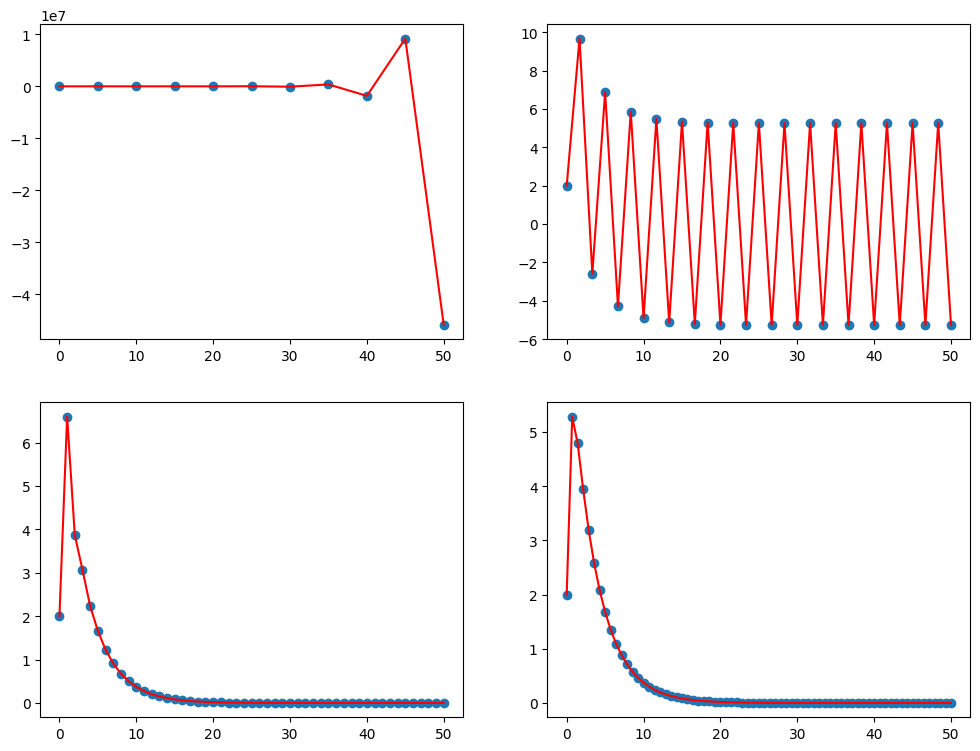

In [45]:
# Forward Euler
def f(t,y):
    return -15*y

y0 = 2

import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,2,figsize=(12,9))


t=np.linspace(0,50,11)
y=forwardEuler(func,t,y0)
axes[0,0].scatter(t,y)
axes[0,0].plot(t,y,'r')

t=np.linspace(0,50,31)
y=forwardEuler(func,t,y0)
axes[0,1].scatter(t,y)
axes[0,1].plot(t,y,'r')

t=np.linspace(0,50,51)
y=forwardEuler(func,t,y0)
axes[1,0].scatter(t,y)
axes[1,0].plot(t,y,'r')

t=np.linspace(0,50,71)
y=forwardEuler(func,t,y0)
axes[1,1].scatter(t,y)
axes[1,1].plot(t,y,'r')

### **Example**
$$y' = -0.8 y^{1.5} +20000(1-e^{-3t}), \;\;\; y(0)=2000$$


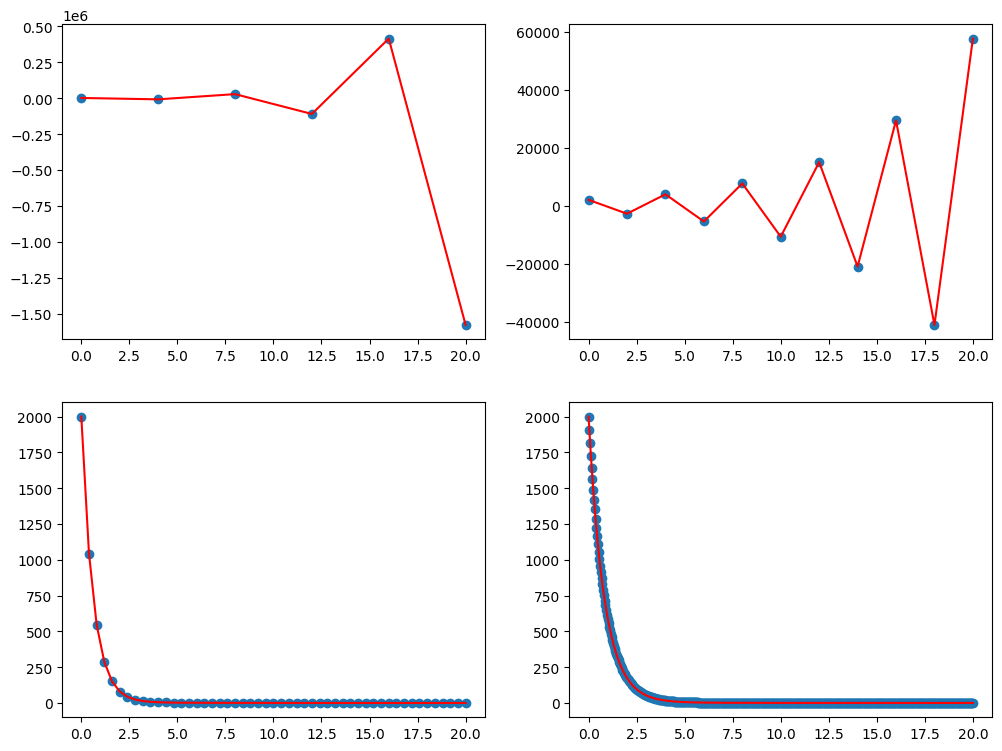

In [53]:
# Forward Euler
def f(t,y):
    return -0.8 * y**(1.5) + 20000*(1-np.exp(-3*t))

y0 = 2000

import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,2,figsize=(12,9))


t=np.linspace(0,20,6)
y=forwardEuler(func,t,y0)
axes[0,0].scatter(t,y)
axes[0,0].plot(t,y,'r')

t=np.linspace(0,20,11)
y=forwardEuler(func,t,y0)
axes[0,1].scatter(t,y)
axes[0,1].plot(t,y,'r')

t=np.linspace(0,20,51)
y=forwardEuler(func,t,y0)
axes[1,0].scatter(t,y)
axes[1,0].plot(t,y,'r')

t=np.linspace(0,20, 501)
y=forwardEuler(func,t,y0)
axes[1,1].scatter(t,y)

axes[1,1].plot(t,y,'r')